## Q1.a (\*)

A simple fundamental frequency estimation is to compute the magnitude spectrum, select the highest peak, and return the corresponding frequency as the result.  Processing the sound in windows will result in a time series of F0 estimates that can be plotted over time. In Marsyas the following `MarSystems` would need to be connected: `SoundFileSource`, `Windowing`, `Spectrum`, `PowerSpectrum`, `Selector`, `MaxArgMax` and `Accumulator`. Check that your method works by using as input a sine.  Show the F0 plot for qbh `examples.wav` with this method when using windows of 1024 samples at 22050 sampling rate

Populating the interactive namespace from numpy and matplotlib


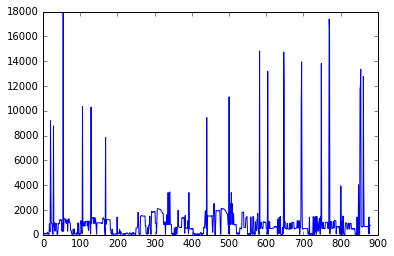

In [48]:
% pylab inline
import marsyas

msm = marsyas.MarSystemManager()
y_data = []

system = marsyas.system_from_script_file("q1a.mrs")
system.getControl("SoundFileSource/input/mrs_bool/hasData").to_bool()
while (system.getControl("SoundFileSource/input/mrs_bool/hasData").to_bool()):
    system.tick()
    y_data.extend(system.getControl("Selector/selection/mrs_realvec/processedData").to_realvec())
    y_data[-1] *=  22050 / 513 # Sampling Rate / FFT Size

plot(range(0, len(y_data)), y_data)

## Q1.b (\*)

Copy your network and modify it to use Autocorrelation for the f0-estimation. Plot the new contour and compare it with the previous one. Is one consistently better than the other?

Populating the interactive namespace from numpy and matplotlib


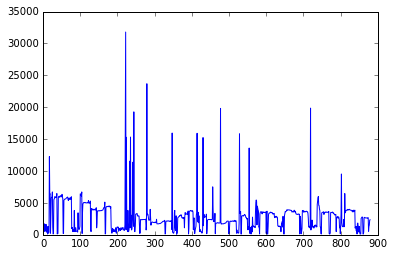

In [1]:
% pylab inline
import marsyas

msm = marsyas.MarSystemManager()
y_data = []

system = marsyas.system_from_script_file("q1b.mrs")
system.getControl("SoundFileSource/input/mrs_bool/hasData").to_bool()
while (system.getControl("SoundFileSource/input/mrs_bool/hasData").to_bool()):
    system.tick()
    y_data.extend(system.getControl("Selector/selection/mrs_realvec/processedData").to_realvec())
    y_data[-1] *=  22050 / 513

plot(range(0, len(y_data)), y_data)

Is it consistently better? Perhaps, it has much less "big peaks" so I presume it is more accurate.

## Q1.c (\*\*)

Change your code so that both the F0 estimates are computed for every window. Plot the sum of the two resulting F0 contours. The computation should be done in one pass through the audio file. In Marsyas use a Fanout after the Windowing followed by a Sum.

Populating the interactive namespace from numpy and matplotlib


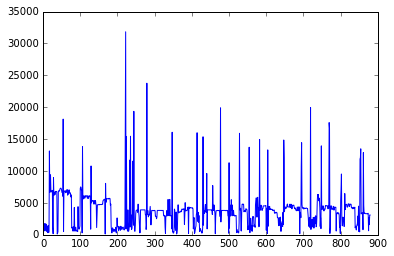

In [3]:
% pylab inline
import marsyas

msm = marsyas.MarSystemManager()
y_data = []

system = marsyas.system_from_script_file("q1c.mrs")
system.getControl("SoundFileSource/input/mrs_bool/hasData").to_bool()
while (system.getControl("SoundFileSource/input/mrs_bool/hasData").to_bool()):
    system.tick()
    y_data.extend(system.getControl("Sum/summer/mrs_realvec/processedData").to_realvec())
    y_data[-1] *=  22050 / 513

plot(range(0, len(y_data)), y_data)